# <span style="color: yellow ; font-size: 48px;">SUN PROTECTION IN AUSTRALIA</span>

**<span style="color: beige ; font-size: 18px;">Data wrangling**

In [86]:

import pandas as pd
import os

# Define the absolute data directory path
data_dir = "/Users/animesh/Documents/MONASH/Final sem/FIT 5120/SUN PROTECTION  DATA/sunprotectioncode/ta30sunsmartbackend/datafiles"

# Define absolute file paths for the incidence and mortality files
incidence_file = os.path.join(data_dir, "CDiA-2024-Book-1a-Cancer-incidence-age-standardised-rates-5-year-age-groups.xlsx")
mortality_file = os.path.join(data_dir, "CDIA-2~1.XLS")

# Define the columns we need for both datasets
cols_needed = ['Data type', 'Cancer group/site', 'Year', 'Sex', 'Age group (years)', 'Count']

# -----------------------------
# Load and Filter Incidence Data
# -----------------------------
# Read the incidence file from sheet 1, skipping the first 5 rows, and load only the needed columns.
incidence_df = pd.read_excel(incidence_file, sheet_name=1, skiprows=5, usecols=cols_needed)

# Filter rows to include only the desired cancer types:
# "Melanoma of the skin" OR "Non-melanoma skin cancer (rare types)"
incidence_filtered = incidence_df[
    incidence_df["Cancer group/site"].isin(["Melanoma of the skin", "Non-melanoma skin cancer (rare types)"])
].copy()

# -----------------------------
# Load and Filter Mortality Data
# -----------------------------
# Read the mortality file from sheet 1, skipping the first 5 rows, and load only the needed columns.
mortality_df = pd.read_excel(mortality_file, sheet_name=1, skiprows=5, usecols=cols_needed)

# Filter rows to include only the desired cancer types:
# "Melanoma of the skin" OR "Non-melanoma skin cancer (all types)"
mortality_filtered = mortality_df[
    mortality_df["Cancer group/site"].isin(["Melanoma of the skin", "Non-melanoma skin cancer (all types)"])
].copy()

# -----------------------------
# Save the Filtered Data as XLSX Files using os.path.join
# -----------------------------
output_file_incidence = os.path.join(data_dir, "filtered_incidence.xlsx")
output_file_mortality = os.path.join(data_dir, "filtered_mortality.xlsx")

incidence_filtered.to_excel(output_file_incidence, index=False)
mortality_filtered.to_excel(output_file_mortality, index=False)

print("Filtered incidence file saved successfully at:", output_file_incidence)
print("Filtered mortality file saved successfully at:", output_file_mortality)

Filtered incidence file saved successfully at: /Users/animesh/Documents/MONASH/Final sem/FIT 5120/SUN PROTECTION  DATA/sunprotectioncode/ta30sunsmartbackend/datafiles/filtered_incidence.xlsx
Filtered mortality file saved successfully at: /Users/animesh/Documents/MONASH/Final sem/FIT 5120/SUN PROTECTION  DATA/sunprotectioncode/ta30sunsmartbackend/datafiles/filtered_mortality.xlsx


In [83]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Define the Data Directory and File Path
# -----------------------------
data_dir = "/Users/animesh/Documents/MONASH/Final sem/FIT 5120/SUN PROTECTION  DATA/sunprotectioncode/ta30sunsmartbackend/datafiles"
file_path = os.path.join(data_dir, "CDiA-2024-Book-7-Cancer-incidence-and-mortality-by-state-and-territory.xlsx")

# -----------------------------
# 2. Load Sheets 2 and 3
# -----------------------------
# Reading from sheet index 1 (second sheet) and sheet index 2 (third sheet), skipping the first 5 rows.
sheet2 = pd.read_excel(file_path, sheet_name=1, skiprows=5)
sheet3 = pd.read_excel(file_path, sheet_name=2, skiprows=5)

# -----------------------------
# 3. Combine the DataFrames
# -----------------------------
combined_df = pd.concat([sheet2, sheet3], ignore_index=True)

# -----------------------------
# 4. Filter for Skin Cancer Rows (Melanoma or Non Melanoma)
# -----------------------------
# Here we assume the column 'Cancer group/site' holds the information.
# First, filter rows that mention "skin" (ignoring case)
mask_skin = combined_df['Cancer group/site'].str.contains("skin", case=False, na=False)

# Then, filter rows that explicitly mention "melanoma" OR "non melanoma" (ignoring case)
mask_melanoma = combined_df['Cancer group/site'].str.contains("melanoma", case=False, na=False)
mask_non_melanoma = combined_df['Cancer group/site'].str.contains("non melanoma", case=False, na=False)

# Combine the filters:
# Keep rows that mention "skin" AND (mention "melanoma" OR "non melanoma")
filtered_df = combined_df[mask_skin & (mask_melanoma | mask_non_melanoma)]

# If you want to treat rows that mention "skin" but do not mention "melanoma" as non-melanoma,
# you could instead do:
# filtered_df = combined_df[mask_skin]  # then later assign type based on whether "melanoma" is present

# Reset index for cleanliness
filtered_df = filtered_df.reset_index(drop=True)

# -----------------------------
# 5. Display Filtered Data Information
# -----------------------------
print("Filtered DataFrame shape:", filtered_df.shape)
print(filtered_df.head())

# output_file = os.path.join(data_dir, "mortality_by_territory.xlsx")
# filtered_df.to_excel(output_file, index=False)
# print("File saved successfully at:", output_file)

Filtered DataFrame shape: (2349, 11)
   Data type     Cancer group/site    Year    Sex State or Territory Count  \
0  Incidence  Melanoma of the skin  1982.0  Males    New South Wales   650   
1  Incidence  Melanoma of the skin  1982.0  Males           Victoria   279   
2  Incidence  Melanoma of the skin  1982.0  Males         Queensland   474   
3  Incidence  Melanoma of the skin  1982.0  Males  Western Australia   164   
4  Incidence  Melanoma of the skin  1982.0  Males    South Australia   121   

  Crude rate\n(per 100,000)  \
0                      24.6   
1                      14.1   
2                      38.9   
3                      24.2   
4                      18.3   

  Age-standardised rate\n2001 Australian Standard Population \n(per 100,000)  \
0                                               28.9                           
1                                               16.8                           
2                                               49.5               

**<span style="color: pink ; font-size: 18px;">Data Details**

In [99]:
import pandas as pd
import os
# -----------------------------
# Load the Excel Files
# -----------------------------
# The data is in the second sheet (index=1) and starts from line 6 (skip first 5 rows)

# Define the absolute data directory path
data_dir = "/Users/animesh/Documents/MONASH/Final sem/FIT 5120/SUN PROTECTION  DATA/sunprotectioncode/ta30sunsmartbackend/datafiles"



# Define absolute file paths for the incidence and mortality files
incidence_file = os.path.join(data_dir, "filtered_incidence.xlsx")
mortality_file = os.path.join(data_dir, "filtered_mortality.XLSx")
mortality_by_territory_file = os.path.join(data_dir, "mortality_by_territory.xlsx")
# Print the absolute paths to verify
print("Incidence file loaded successfully")
print("Mortality file loaded sucessfully")

# Read the incidence data from the second sheet, skipping first 5 rows
incidence_data = pd.read_excel(incidence_file,)

# Read the mortality data from the second sheet, skipping first 5 rows
mortality_data = pd.read_excel(mortality_file)

# Read the territory_data 
territory_data = pd.read_excel(mortality_by_territory_file)



# -----------------------------
# Load the Excel file
# -----------------------------
# If the data is on the first sheet, you can use the default sheet (or adjust sheet_name if necessary)
mortality_by_territory_data = pd.read_excel(mortality_by_territory_file)



# -----------------------------
# Display Information for Incidence Data
# -----------------------------
print("=== Incidence Data Information ===")
# Print the column names
print("Column Names:")
print(incidence_data.columns.tolist())

# Print the total number of columns
print("Total number of columns:", len(incidence_data.columns))

# Print the total number of rows
print("Total number of rows:", incidence_data.shape[0])

# Print data types for each column
print("\nData Types:")
print(incidence_data.dtypes)

# Print the first 10 rows of the dataset
print("\nFirst 10 Rows:")
print(incidence_data.head(10))

# -----------------------------
# Display Information for Mortality Data
# -----------------------------
print("\n=== ==================Mortality Data Information============================ ===")
# Print the column names
print("Column Names:")
print(mortality_data.columns.tolist())

# Print the total number of columns
print("Total number of columns:", len(mortality_data.columns))

# Print the total number of rows
print("Total number of rows:", mortality_data.shape[0])

# Print data types for each column
print("\nData Types:")
print(mortality_data.dtypes)

# Print the first 10 rows of the dataset
print("\nFirst 10 Rows:")
print(mortality_data.head(10))

# -----------------------------
# Display Information for Mortality Data
# -----------------------------
print("\n=== ==================territory Data Information============================ ===")


# -----------------------------
# Define the absolute file path for the mortality_by_territory.xlsx file
# -----------------------------
mortality_by_territory_file = os.path.join(data_dir, "mortality_by_territory.xlsx")

# Print the absolute path to verify
print("Mortality by Territory file loaded successfully:")
print(mortality_by_territory_file)

# -----------------------------
# Load the Excel file
# -----------------------------


# -----------------------------
# Display Information for Mortality by Territory Data
# -----------------------------
print("\n=== Mortality by Territory Data Information ===")
# Print the column names
print("Column Names:")
print(mortality_by_territory_data.columns.tolist())

# Print the total number of columns
print("Total number of columns:", len(mortality_by_territory_data.columns))

# Print the total number of rows
print("Total number of rows:", mortality_by_territory_data.shape[0])

# Print data types for each column
print("\nData Types:")
print(mortality_by_territory_data.dtypes)

# Print the first 10 rows of the dataset
print("\nFirst 10 Rows:")
print(mortality_by_territory_data.head(10))

Incidence file loaded successfully
Mortality file loaded sucessfully
=== Incidence Data Information ===
Column Names:
['Data type', 'Cancer group/site', 'Year', 'Sex', 'Age group (years)', 'Count']
Total number of columns: 6
Total number of rows: 4020

Data Types:
Data type            object
Cancer group/site    object
Year                  int64
Sex                  object
Age group (years)    object
Count                 int64
dtype: object

First 10 Rows:
  Data type     Cancer group/site  Year    Sex Age group (years)  Count
0    Actual  Melanoma of the skin  1982  Males             00-04      0
1    Actual  Melanoma of the skin  1982  Males             05-09      0
2    Actual  Melanoma of the skin  1982  Males             10-14      6
3    Actual  Melanoma of the skin  1982  Males             15-19     30
4    Actual  Melanoma of the skin  1982  Males             20-24     52
5    Actual  Melanoma of the skin  1982  Males             25-29     83
6    Actual  Melanoma of the skin

**<span style="color: silver ; font-size: 18px;">distinct values**

In [ ]:
# -----------------------------
# Function to print distinct values and their count for each column
# -----------------------------
def print_distinct_values(df, dataset_name):
    print(f"\n=== Distinct Values in {dataset_name} Dataset ===")
    for column in df.columns:
        unique_values = df[column].dropna().unique()  # Drop NaN values before getting unique values
        unique_count = len(unique_values)
        print(f"Column: {column}")
        print(f"Unique Values Count: {unique_count}")
        print(f"Unique Values: {unique_values}")  # Print all unique values
        print("-" * 50)

# -----------------------------
# Display Distinct Values for Incidence Data
# -----------------------------
print_distinct_values(incidence_data, "Incidence")

# -----------------------------
# Display Distinct Values for Mortality Data
# -----------------------------
print_distinct_values(mortality_data, "Mortality")


H3"vISULIZATION"

In [116]:
# # Filter data for 'Actual' entries only
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for 'Actual' entries only
incidence_data = incidence_data[incidence_data['Data type'] == 'Actual']
mortality_data = mortality_data[mortality_data['Data type'] == 'Actual']

# Filter for skin cancer
skin_cancer_incidence = incidence_data[incidence_data['Cancer group/site'].str.contains("Skin", na=False, case=False)]

skin_cancer_mortality = mortality_data[mortality_data['Cancer group/site'].str.contains("Skin", na=False, case=False)]

# Convert Year to integer for proper visualization
incidence_data['Year'] = incidence_data['Year'].astype(int)
mortality_data['Year'] = mortality_data['Year'].astype(int)


**<span style="color: pink ; font-size: 18px;">EFFECT OF SKIN CANCER IN AUSTRALIA**

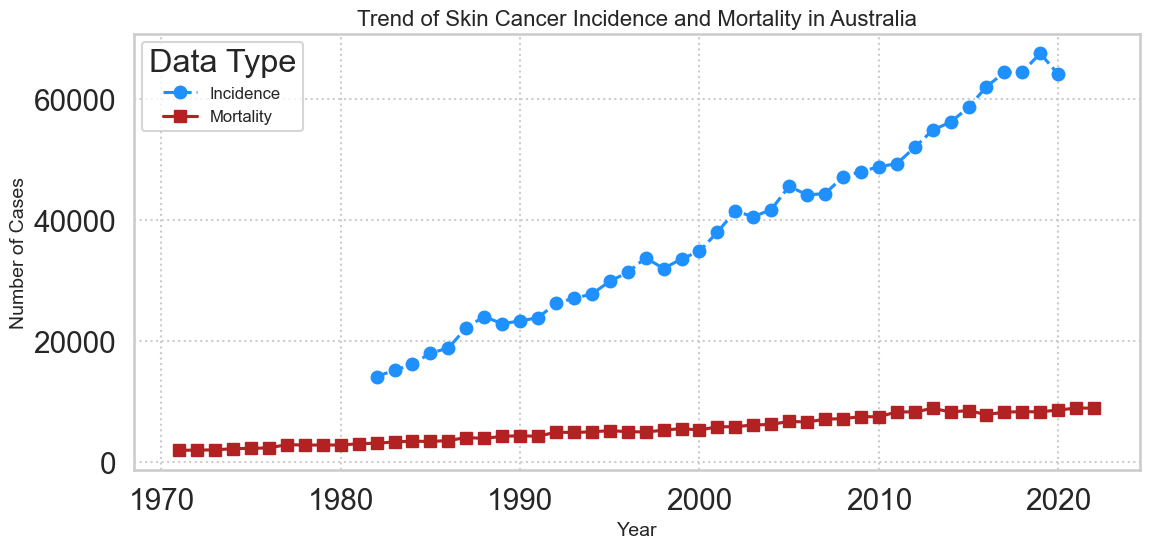

In [133]:
import numpy as np
# -----------------------------
# 3. Filter for Skin Cancer Data
# -----------------------------
mask_skin_incidence = incidence_data['Cancer group/site'].str.contains("skin", case=False, na=False)
mask_skin_mortality = mortality_data['Cancer group/site'].str.contains("skin", case=False, na=False)

incidence_skin = incidence_data[mask_skin_incidence].copy()
mortality_skin = mortality_data[mask_skin_mortality].copy()

# Convert "Count" columns to numeric
incidence_skin["Count"] = pd.to_numeric(incidence_skin["Count"], errors="coerce")
mortality_skin["Count"] = pd.to_numeric(mortality_skin["Count"], errors="coerce")
territory_data["Count"] = pd.to_numeric(territory_data["Count"], errors="coerce")

# Create a "Cancer_Type" column based on the text in "Cancer group/site"
incidence_skin["Cancer_Type"] = incidence_skin["Cancer group/site"].apply(
    lambda x: "Melanoma" if "melanoma" in x.lower() else "Non-Melanoma"
)
mortality_skin["Cancer_Type"] = mortality_skin["Cancer group/site"].apply(
    lambda x: "Non-Melanoma" if "non-melanoma" in x.lower() else "Melanoma"
)





#  Exclude "All ages combined" if it makes one bar huge
age_df = age_df[age_df["Age group (years)"] != "All ages combined"]

# =============================
# Visualization 1: Trend Over Time (Line Chart)
# =============================
# (Count annotations removed from the line chart)
incidence_by_year = incidence_skin.groupby("Year")["Count"].sum().reset_index()
mortality_by_year = mortality_skin.groupby("Year")["Count"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(incidence_by_year["Year"], incidence_by_year["Count"], marker="o", linestyle="--", color="dodgerblue", label="Incidence")
plt.plot(mortality_by_year["Year"], mortality_by_year["Count"], marker="s", linestyle="-", color="firebrick", label="Mortality")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)
plt.title("Trend of Skin Cancer Incidence and Mortality in Australia", fontsize=16)
plt.legend(title="Data Type", fontsize=12)
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()







<span style="color: red ; font-size: 18px;">Skin cancer mortality in different age group

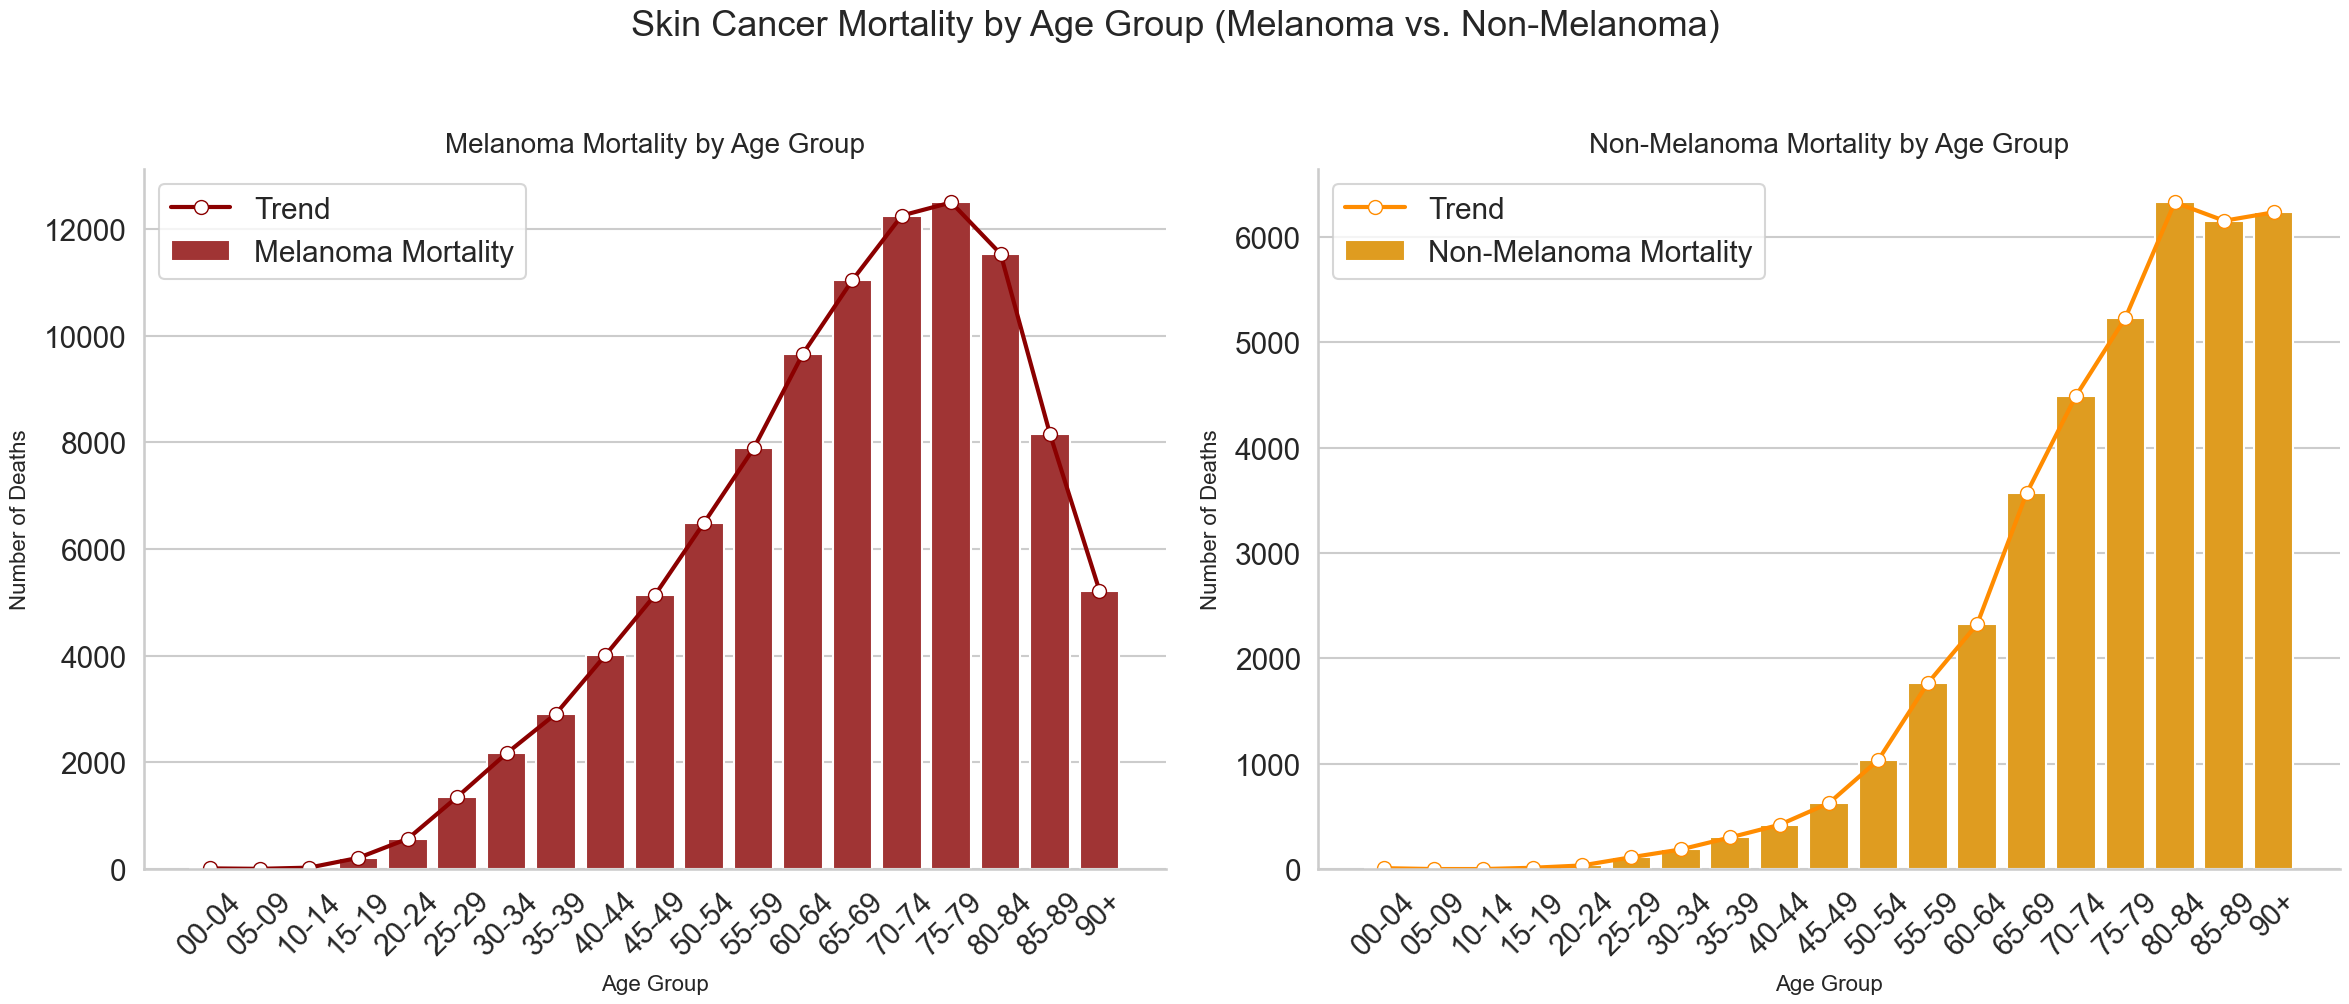

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Filter for Melanoma
melanoma_mortality_age = (
    mortality_skin[mortality_skin["Cancer_Type"] == "Melanoma"]
    .groupby("Age group (years)")["Count"]
    .sum()
    .reset_index()
    .rename(columns={"Count": "Count_Melanoma"})
)

# Filter for Non-Melanoma
nonmelanoma_mortality_age = (
    mortality_skin[mortality_skin["Cancer_Type"] == "Non-Melanoma"]
    .groupby("Age group (years)")["Count"]
    .sum()
    .reset_index()
    .rename(columns={"Count": "Count_NonMelanoma"})
)

# 2. Merge into one DataFrame on "Age group (years)"
age_df = pd.merge(
    melanoma_mortality_age,
    nonmelanoma_mortality_age,
    on="Age group (years)",
    how="outer"
).fillna(0)

#  Exclude "All ages combined" if it makes one bar huge
age_df = age_df[age_df["Age group (years)"] != "All ages combined"]

# =============================
# Visualization 2: skin cancer and mortality age gourp wise
# =============================

# --- Seaborn style & context for larger fonts ---
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.3)

# 3. Create a larger figure
fig, axes = plt.subplots(ncols=2, figsize=(24, 10), sharey=False)

# Add a shared figure title
fig.suptitle("Skin Cancer Mortality by Age Group (Melanoma vs. Non-Melanoma)", fontsize=26, y=1.02)

# Remove top & right spines for a cleaner look
for ax in axes:
    sns.despine(ax=ax, top=True, right=True)

# -----------------------------------------
# Left subplot: Melanoma mortality by age
# -----------------------------------------
sns.barplot(
    ax=axes[0],
    data=age_df,
    x="Age group (years)",
    y="Count_Melanoma",
    color="firebrick",
    label="Melanoma Mortality"
)
axes[0].set_title("Melanoma Mortality by Age Group", fontsize=20, pad=12)
axes[0].set_xlabel("Age Group", fontsize=16, labelpad=10)
axes[0].set_ylabel("Number of Deaths", fontsize=16, labelpad=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc="best")

# Overlay a line connecting the top of each bar (trend line)
bars_mela = axes[0].patches
x_coords_mela = [bar.get_x() + bar.get_width() / 2 for bar in bars_mela]
y_coords_mela = [bar.get_height() for bar in bars_mela]
axes[0].plot(
    x_coords_mela,
    y_coords_mela,
    color='darkred',
    marker='o',
    markersize=10,
    markerfacecolor='white',
    markeredgecolor='darkred',
    linewidth=3,
    label="Trend"
)
axes[0].legend(loc="best")

# -----------------------------------------
# Right subplot: Non-Melanoma mortality by age
# -----------------------------------------
sns.barplot(
    ax=axes[1],
    data=age_df,
    x="Age group (years)",
    y="Count_NonMelanoma",
    color="orange",
    label="Non-Melanoma Mortality"
)
axes[1].set_title("Non-Melanoma Mortality by Age Group", fontsize=20, pad=12)
axes[1].set_xlabel("Age Group", fontsize=16, labelpad=10)
axes[1].set_ylabel("Number of Deaths", fontsize=16, labelpad=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc="best")

# Overlay a line connecting the top of each bar (trend line)
bars_nonmela = axes[1].patches
x_coords_nonmela = [bar.get_x() + bar.get_width() / 2 for bar in bars_nonmela]
y_coords_nonmela = [bar.get_height() for bar in bars_nonmela]
axes[1].plot(
    x_coords_nonmela,
    y_coords_nonmela,
    color='darkorange',
    marker='o',
    markersize=10,
    markerfacecolor='white',
    markeredgecolor='darkorange',
    linewidth=3,
    label="Trend"
)
axes[1].legend(loc="best")

plt.tight_layout()
plt.show()

<span style="color: green ; font-size: 18px;">Incidence and mortality by territory

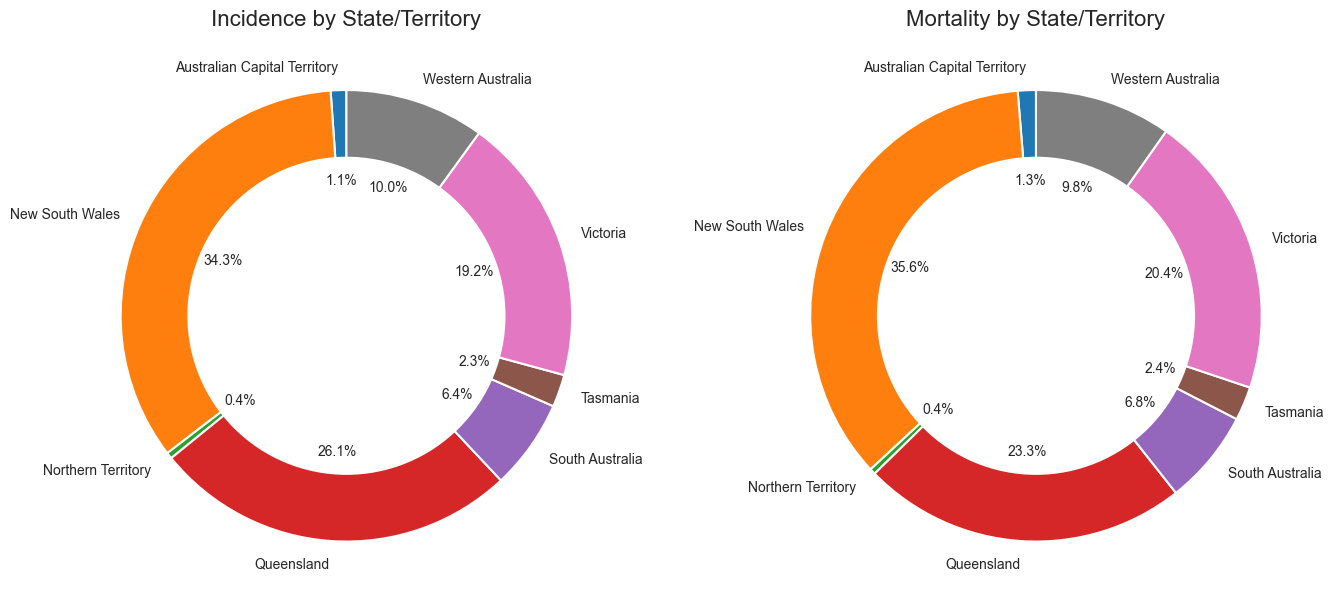

In [130]:
import matplotlib.pyplot as plt

# 1. Group the Territory Data by State/Territory and Data Type
territory_grouped = territory_data.groupby(["State or Territory", "Data type"])["Count"].sum().reset_index()

# 2. Filter out the row(s) where "State or Territory" is "Australia"
#    and separate data into Incidence vs. Mortality
incidence_territory = territory_grouped[
    (territory_grouped["Data type"] == "Incidence") &
    (territory_grouped["State or Territory"] != "Australia")
]
mortality_territory = territory_grouped[
    (territory_grouped["Data type"] == "Mortality") &
    (territory_grouped["State or Territory"] != "Australia")
]

# 3. Create Two Donut Charts Side by Side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# -- Incidence Donut --
wedges, texts, autotexts = axes[0].pie(
    incidence_territory["Count"],
    labels=incidence_territory["State or Territory"],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10}
)
# Create a white circle at the center for the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[0].add_artist(centre_circle)
axes[0].set_title("Incidence by State/Territory", fontsize=16)

# -- Mortality Donut --
wedges, texts, autotexts = axes[1].pie(
    mortality_territory["Count"],
    labels=mortality_territory["State or Territory"],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10}
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_title("Mortality by State/Territory", fontsize=16)

plt.tight_layout()
plt.show()

<span style="color: brown ; font-size: 18px;">Mortality by skin cancer type 

    Cancer_Type   Count
0      Melanoma  202318
1  Non-Melanoma   77660


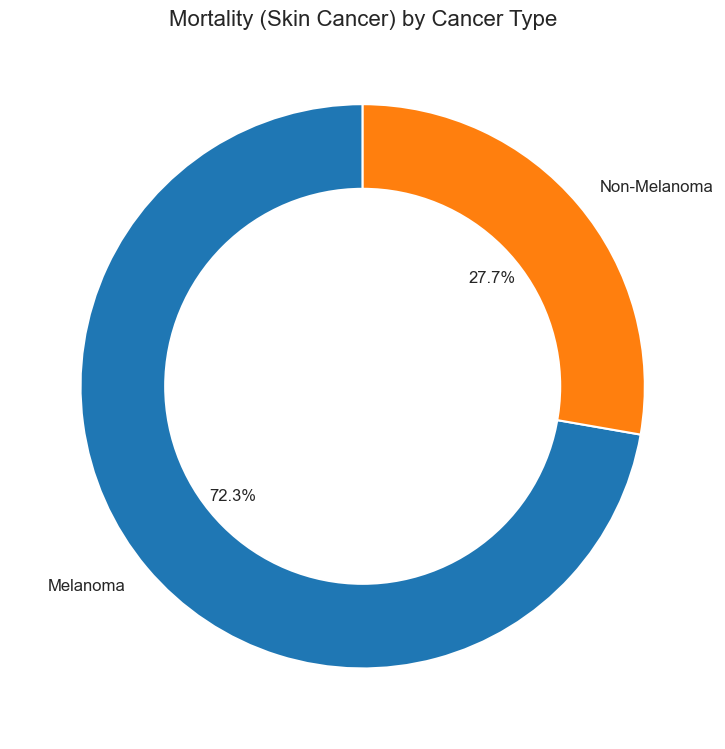

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

# If not already computed, ensure that mortality_skin has a "Cancer_Type" column:
mortality_skin["Cancer_Type"] = mortality_skin["Cancer group/site"].apply(
    lambda x: "Non-Melanoma" if "non-melanoma" in x.lower() else "Melanoma"
)

# Group mortality_skin data by Cancer_Type and sum the "Count"
mortality_by_type_skin = mortality_skin.groupby("Cancer_Type")["Count"].sum().reset_index()

# Print the aggregated results (for verification)
print(mortality_by_type_skin)

# Create a donut chart for the mortality_skin data
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    mortality_by_type_skin["Count"],
    labels=mortality_by_type_skin["Cancer_Type"],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)
# Create the donut effect by adding a white circle in the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

ax.set_title("Mortality (Skin Cancer) by Cancer Type", fontsize=16)
plt.tight_layout()
plt.show()




CORRLATION BETWEEN INCIDENCE AND MORTALITY 

In [109]:
import pandas as pd
import plotly.express as px

# -----------------------------
# Aggregate Data by Year
# -----------------------------
# Group the incidence and mortality data (already filtered for skin cancer) by Year
incidence_by_year = incidence_skin.groupby("Year")["Count"].sum().reset_index()
mortality_by_year = mortality_skin.groupby("Year")["Count"].sum().reset_index()

# Merge the two datasets on Year
df_year = pd.merge(incidence_by_year, mortality_by_year, on="Year", suffixes=("_Incidence", "_Mortality"))

# -----------------------------
# Calculate the Correlation
# -----------------------------
correlation = df_year["Count_Incidence"].corr(df_year["Count_Mortality"])
print("Correlation between Incidence and Mortality:", correlation)

# -----------------------------
# Create a Scatter Plot with a Regression Line
# -----------------------------
fig = px.scatter(df_year, 
                 x="Count_Incidence", 
                 y="Count_Mortality",
                 trendline="ols",
                 title=f"Correlation between Skin Cancer Incidence and Mortality (r = {correlation:.2f})",
                 labels={"Count_Incidence": "Incidence Count", "Count_Mortality": "Mortality Count"})
fig.show()







import statsmodels.api as sm
import statsmodels.formula.api as smf

# Suppose df_year has these columns:
#   "Count_Incidence" and "Count_Mortality"

# 1. Fit a linear regression model
model = smf.ols("Count_Mortality ~ Count_Incidence", data=df_year).fit()

# 2. Print out the summary to see the slope (coefficient) and intercept
print(model.summary())

# 3. Extract the slope and intercept
intercept = model.params["Intercept"]
slope = model.params["Count_Incidence"]

print(f"\nInterpretation:")
print(f"For every 1 additional incidence case, mortality increases by about {slope:.2f} cases.")
print(f"Intercept (base mortality) when incidence is zero: {intercept:.2f}")

Correlation between Incidence and Mortality: 0.9703832926770269


                            OLS Regression Results                            
Dep. Variable:        Count_Mortality   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     597.0
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           1.99e-24
Time:                        13:30:18   Log-Likelihood:                -291.75
No. Observations:                  39   AIC:                             587.5
Df Residuals:                      37   BIC:                             590.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1704.2627    190.148     

In [111]:
import pandas as pd

# Group incidence data by year and sum counts
incidence_by_year = incidence_skin.groupby("Year")["Count"].sum().reset_index()
incidence_by_year.rename(columns={"Count": "Incidence"}, inplace=True)

# Group mortality data by year and sum counts
mortality_by_year = mortality_skin.groupby("Year")["Count"].sum().reset_index()
mortality_by_year.rename(columns={"Count": "Mortality"}, inplace=True)

# Merge on "Year"
df_year = pd.merge(incidence_by_year, mortality_by_year, on="Year", how="inner")

# Calculate "Mortality per 10 Incidence" for each year
df_year["Mortality_per_10_Incidence"] = (df_year["Mortality"] / df_year["Incidence"]) * 10

print(df_year)

    Year  Incidence  Mortality  Mortality_per_10_Incidence
0   1982      14150       3140                    2.219081
1   1983      15190       3344                    2.201448
2   1984      16160       3472                    2.148515
3   1985      18022       3424                    1.899900
4   1986      18842       3576                    1.897888
5   1987      22228       4072                    1.831924
6   1988      24064       3928                    1.632314
7   1989      22868       4268                    1.866363
8   1990      23340       4372                    1.873179
9   1991      23862       4280                    1.793647
10  1992      26252       4960                    1.889380
11  1993      27074       4908                    1.812809
12  1994      27770       5020                    1.807706
13  1995      29884       5208                    1.742739
14  1996      31348       5056                    1.612862
15  1997      33764       4980                    1.4749